<a href="https://colab.research.google.com/github/Liz0088/trying-out-ai/blob/main/lung_cancer_predict_logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Severity of Lung Cancer Based on Environmental Factors and Patient Symptoms

In [ ]:
# dataset: https://www.kaggle.com/datasets/thedevastator/cancer-patients-and-air-pollution-a-new-link?resource=download&select=cancer+patient+data+sets.csv

In [ ]:
from google.colab import files
files.upload()
import pandas as pd
import numpy as np
import matplotlib as plt

Saving cancer patient data sets no id.csv to cancer patient data sets no id (1).csv


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
dp = pd.read_csv("cancer patient data sets no id.csv", header=0)
dp = dp.dropna()
print(dp.shape)
dp.head()

(1000, 24)


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,0,33,1,2,4,5,4,3,2,2,...,4,3,4,2,2,3,1,2,3,4
1,1,17,1,3,1,5,3,4,2,2,...,3,1,3,7,8,6,2,1,7,2
2,2,35,1,4,5,6,5,5,4,6,...,8,8,7,9,2,1,4,6,7,2
3,3,37,1,7,7,7,7,6,7,7,...,8,4,2,3,1,4,5,6,7,5
4,4,46,1,6,8,7,7,7,6,7,...,9,3,2,4,1,4,2,4,2,3


In [ ]:
# checking the number of cases for each severity from 1 - 7 and looking at which features are most important
print(dp['chronic Lung Disease'].value_counts())
dp.groupby("chronic Lung Disease").mean()

6    308
2    173
4    141
3    141
7    107
5     80
1     50
Name: chronic Lung Disease, dtype: int64


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
chronic Lung Disease,,,,,,,,,,,,,,,,,,,,,
1,488.780000,36.400000,1.600000,2.400000,2.200000,2.800000,1.800000,1.400000,1.800000,2.200000,...,3.600000,2.200000,1.800000,2.800000,2.600000,3.600000,2.400000,1.600000,2.000000,1.600000
2,487.248555,32.589595,1.375723,2.473988,2.872832,4.294798,2.878613,2.942197,3.225434,2.774566,...,2.710983,2.710983,3.589595,4.572254,4.456647,3.867052,3.757225,4.161850,4.647399,3.526012
3,482.567376,34.092199,1.581560,2.574468,1.354610,3.787234,2.787234,2.425532,2.865248,2.929078,...,2.914894,3.283688,3.985816,2.212766,3.645390,4.269504,2.000000,2.929078,2.652482,2.645390
4,523.382979,41.326241,1.560284,3.127660,3.702128,4.489362,4.496454,3.702128,4.773050,5.056738,...,5.773050,5.843972,4.262411,5.404255,2.652482,2.808511,4.078014,5.134752,4.765957,3.085106
5,462.662500,41.375000,1.400000,2.625000,3.375000,3.875000,4.500000,4.500000,3.750000,3.875000,...,3.500000,3.500000,3.750000,3.500000,2.375000,4.000000,4.375000,1.875000,3.500000,2.250000
6,518.094156,39.279221,1.340909,5.376623,7.288961,6.675325,6.870130,6.805195,5.668831,6.058442,...,6.350649,3.853896,4.480519,4.707792,4.827922,3.646104,4.678571,3.126623,3.159091,2.795455
7,489.177570,34.336449,1.084112,5.813084,6.803738,7.000000,7.000000,6.364486,6.728972,5.355140,...,7.000000,4.887850,2.813084,4.719626,2.906542,4.261682,4.719626,4.542056,6.074766,3.616822


###First run

In [ ]:
from sklearn.feature_selection import RFE

data_final_vars = dp.columns.values.tolist()

X = dp.loc[:, dp.columns != 'chronic Lung Disease']
y = dp.loc[:, dp.columns == 'chronic Lung Disease']
y_feature = ['chronic Lung Disease']
X_feature = [i for i in data_final_vars if i not in y_feature]

# pick out most relevant features
logreg = LogisticRegression(max_iter=100)
rfe = RFE(logreg, step = 20, n_features_to_select = 10)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True False  True  True False False  True False
  True  True False False False  True False False  True  True False]
[2 2 2 1 1 2 1 1 2 2 1 2 1 1 2 2 2 1 2 2 1 1 2]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [ ]:
# first set of features
# final_features based on results of RFE
final_features = ["Air Pollution", "Alcohol use", "OccuPational Hazards", "Genetic Risk", "Smoking", "Chest Pain", "Coughing of Blood", "Wheezing", "Frequent Cold", "Dry Cough"]
X_feature = final_features

In [ ]:
X = dp[final_features]
y = dp['chronic Lung Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logreg.predict(X_test)
print("Model Score: %.5f" % logreg.score(X_test, y_test))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) # not sure what this means but it looks cool -- will investigate further

Model Score: 0.91333
[[14  0  0  0  0  0  0]
 [ 0 41  6  0  0  0  0]
 [ 0  2 51  0  0  0  0]
 [ 0  0  0 48  0  0  0]
 [ 0  9  0  0 18  0  0]
 [ 5  0  0  0  0 83  0]
 [ 0  0  0  0  0  4 19]]


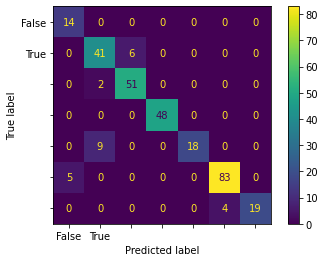

In [ ]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

###Second run

In [ ]:
# second run with more iterations to see different set of features

data_final_vars = dp.columns.values.tolist()

X = dp.loc[:, dp.columns != 'chronic Lung Disease']
y = dp.loc[:, dp.columns == 'chronic Lung Disease']
y_feature = ['chronic Lung Disease']
X_feature = [i for i in data_final_vars if i not in y_feature]

# pick out most relevant features
logreg = LogisticRegression(max_iter=2000)
rfe = RFE(logreg, step = 20, n_features_to_select = 10)
rfe = rfe.fit(X, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False False  True False False  True  True False  True  True
 False False  True  True False False False False  True  True  True]
[2 2 2 2 1 2 2 1 1 2 1 1 2 2 1 1 2 2 2 2 1 1 1]


In [ ]:
# second set of features
final_features = ["Alcohol use", "Genetic Risk", "Balanced Diet", "Smoking", "Passive Smoker", "Fatigue", "Weight Loss", "Frequent Cold", "Dry Cough", "Snoring"]
X_feature = final_features
X = dp[final_features]
y = dp['chronic Lung Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(max_iter=2000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = logreg.predict(X_test)
print("Model Score: %.5f" % logreg.score(X_test, y_test))

Model Score: 0.94000


###Third run

In [ ]:
from sklearn import neighbors

kneighbors = neighbors.KNeighborsClassifier(n_neighbors = 3)
kneighbors.fit(X_train, y_train) # uses features from second run

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = kneighbors.predict(X_test)
print(kneighbors.score(X_test, y_test))

1.0
